<a href="https://colab.research.google.com/github/Riswanpk/LGMVIP-DataScience-Task-Number/blob/main/Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 04 : DEVELOP A NEURAL NETWORK THAT CAN READ HANDWRITING

**Step 01 : Importing Necessary Libraries**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image

**Step 02 : Load and Preprocess the dataset**

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

11490434/11490434 [==============================] - 0s 0us/step


**Step 03 : One-hot encode labels**

In [3]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

**Step 04 : Build the CNN Model**

In [4]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [5]:
model.add(layers.Flatten())

In [6]:
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

**Step 05 : Compile The Model**

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Step 06 : Display model Summary**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

**Step 07 : Train the Model**

In [9]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 35s 72ms/step - loss: 0.2219 - accuracy: 0.9363 - val_loss: 0.0753 - val_accuracy: 0.9771
Epoch 2/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0408 - val_accuracy: 0.9859
Epoch 3/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0381 - val_accuracy: 0.9874
Epoch 4/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0369 - val_accuracy: 0.9875
Epoch 5/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0302 - val_accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0266 - val_accuracy: 0.9904
Epoch 7/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0319 - val_accuracy:

**Step 08 : Evaluate the Model**

In [10]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0284 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


**Step 09 : Test model with sample image from test data**

In [11]:
sample_image_idx=np.random.randint(0,len(x_test))
sample_image=x_test[sample_image_idx]

true_label=np.argmax(y_test[sample_image_idx])

sample_image=sample_image.reshape(1,28,28,1)

predictions=model.predict(sample_image)
predicted_label=np.argmax(predictions)

print(f'True label: {true_label}, Predicted label: {predicted_label}')

1/1 [==============================] - 0s 130ms/step
True label: 1, Predicted label: 1


**Step 10 : Testing Model on New image **

In [12]:
image=Image.open('number.jpg')

In [13]:
image=image.convert('L')

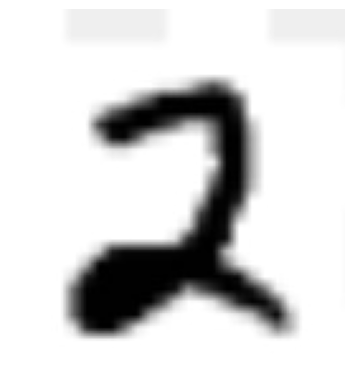

In [14]:
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

**Step 11 : preprocess the image for prediction**

In [15]:
image=image.resize((28,28))
image=tf.keras.preprocessing.image.img_to_array(image)
image=tf.reshape(image,(1,28,28,1))
image=tf.cast(image,tf.float32)/255.0

**Step 12 : Make prediction**

In [16]:
prediction=model.predict(image)
predicted_label=tf.argmax(prediction,axis=1)[0].numpy()

print(f'Predicted label: {predicted_label}')

1/1 [==============================] - 0s 68ms/step
Predicted label: 2
